In [1]:
import cv2
import numpy as np
import time
from pytesseract import image_to_string
import matplotlib.pyplot as plt
import datetime

In [35]:
def euclidean_dist(A,B):
    return np.sqrt(np.sum((A.astype("float") - B.astype("float"))**2))

def manhattan_dist(A,B):
    return np.sum(abs(A - B))

def mse(imageA, imageB):

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

### Find threshold for different measures

In [4]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fcount = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
fnum = 0

ret,frame = capture.read()
prev = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
pheader = prev[0:80,40:940]
count = 1

if ret:
    fnum = 1

mse_orig,mh_orig,ed_orig= [],[],[]
mse_header,mh_header,ed_header = [],[],[]
f_list = []
while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1:
        #if fnum % fps == 0:
        gray = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
        gheader = gray[0:80,40:940]
        
        mse_orig.append(mse(gray[80:452,10:952],prev[80:452,10:952]))
        mse_header.append(mse(gheader,pheader))
        
        mh_orig.append(manhattan_dist(gray[80:452,10:952],prev[80:452,10:952]))
        mh_header.append(manhattan_dist(gheader,pheader))
        
        ed_orig.append(euclidean_dist(gray[80:452,10:952],prev[80:452,10:952]))
        ed_header.append(euclidean_dist(gheader,pheader))
        f_list.append(fnum)

        prev = gray
        pheader = prev[0:80,40:940]

        fnum += 1
    else:
        break
        
capture.release()

In [5]:
len(mse_orig),len(mse_header),len(f_list),fcount

(27108, 27108, 27108, 27163)

In [6]:
import matplotlib.pyplot as plt

### MSE

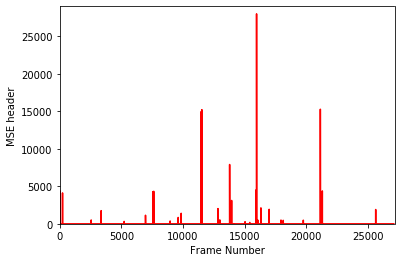

In [15]:
plt.plot(f_list,mse_header,'r')
plt.axis([0,fcount,0,max(mse_header)+1000])
plt.xlabel('Frame Number')
plt.ylabel('MSE header')
plt.savefig('MSE_header.jpeg')
plt.show()

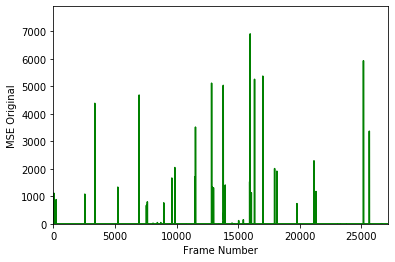

In [16]:
plt.plot(f_list,mse_orig,'g')
plt.axis([0,fcount,0,max(mse_orig)+1000])
plt.xlabel('Frame Number')
plt.ylabel('MSE Original')
plt.savefig('MSE Original.jpeg')
plt.show()

### Manhattan distance

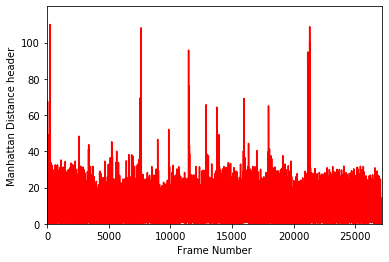

In [17]:
plt.plot(f_list,np.asarray(mh_header)/100000,'r')
plt.axis([0,fcount,0,max(np.asarray(mh_header)/100000)+10])
plt.xlabel('Frame Number')
plt.ylabel('Manhattan Distance header')
plt.savefig('Manhattan Distance header.jpeg')
plt.show()

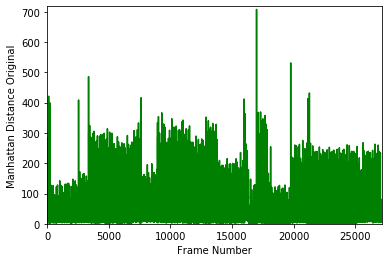

In [18]:
plt.plot(f_list,np.asarray(mh_orig)/100000,'g')
plt.axis([0,fcount,0,max(np.asarray(mh_orig)/100000)+10])
plt.xlabel('Frame Number')
plt.ylabel('Manhattan Distance Original')
plt.savefig('Manhattan Distance Original.jpeg')
plt.show()

### Euclidean distance

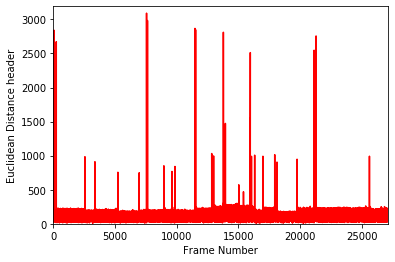

In [19]:
plt.plot(f_list,ed_header,'r')
plt.axis([0,fcount,0,max(ed_header)+100])
plt.xlabel('Frame Number')
plt.ylabel('Euclidean Distance header')
plt.savefig('Euclidean Distance header.jpeg')
plt.show()

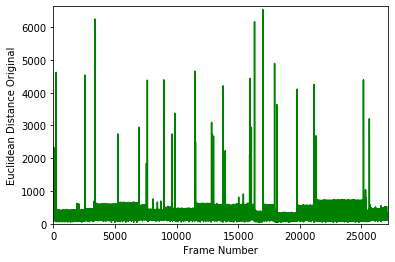

In [20]:
plt.plot(f_list,ed_orig,'g')
plt.axis([0,fcount,0,max(ed_orig)+100])
plt.xlabel('Frame Number')
plt.ylabel('Euclidean Distance Original')
plt.savefig('Euclidean Distance Original.jpeg')
plt.show()

## Unique slide using continuous frame comparison

In [36]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

mean_square_error,mh,ed = [],[],[]
flist = []
flist1 = []

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error.append(mse(cur_canny,prev_canny))
            mh.append(manhattan_dist(cur_canny,prev_canny))
            ed.append(euclidean_dist(cur_canny,prev_canny))
            prev_canny = cur_canny
            
            flist.append(count)
            flist1.append(fnum)
            
        fnum += 1
    
    else:
        break
        
capture.release()

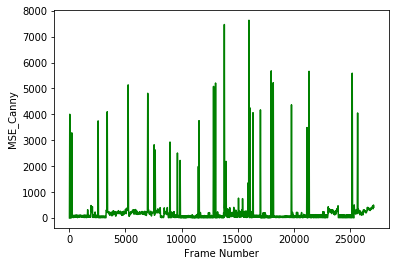

In [14]:
plt.plot(flist1,mean_square_error,'g')
plt.xlabel('Frame Number')
plt.ylabel('MSE_Canny')
plt.savefig('format_report_slide/format_report_slide_1/Presentation_Image/MSE_Canny.jpeg')
plt.show()

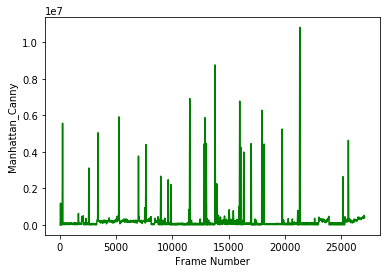

In [15]:
plt.plot(flist1,mh,'g')
plt.xlabel('Frame Number')
plt.ylabel('Manhattan_Canny')
plt.savefig('format_report_slide/format_report_slide_1/Presentation_Image/Manhattan_Canny.jpeg')
plt.show()

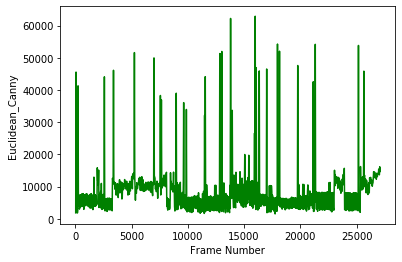

In [40]:
plt.plot(flist1,ed,'g')
plt.xlabel('Frame Number')
plt.ylabel('Euclidean_Canny')
plt.savefig('format_report_slide/format_report_slide_1/Presentation_Image/Euclidean_Canny.jpeg')
plt.show()

### MSE Threshold 1100

In [17]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error = mse(cur_canny,prev_canny)
            
            if mean_square_error > 1100:
                name = 'MSE_Canny_threshold_1100/slide_'+str(fnum)+'.jpg'
                cv2.imwrite(name,prev_canny)
#                 cv2.imshow('frame1',prev_canny)
                
#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break                  
                    
            prev_canny = cur_canny
            
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

### MSE threshold 1500

In [27]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum,count = 0,0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120) #creating canny edge

if ret:
    fnum = 1

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    if ret1 == True:       
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
            mean_square_error = mse(cur_canny,prev_canny)
            if mean_square_error > 1500:
                name = 'MSE_Canny_threshold_1500/slide_'+str(fnum)+'.jpg'
                cv2.imwrite(name,prev_canny)  
            prev_canny = cur_canny
        fnum += 1   
    else:
        break
    
capture.release()
cv2.destroyAllWindows()

### MSE threshold 2000

In [28]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error = mse(cur_canny,prev_canny)
            
            if mean_square_error > 2000:
                name = 'MSE_Canny_threshold_2000/slide_'+str(fnum)+'.jpg'
                cv2.imwrite(name,prev_canny)
#                 cv2.imshow('frame1',prev_canny)
                
#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break                  
                    
            prev_canny = cur_canny
            
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

### Manhattan Threshold 800000

In [31]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error = manhattan_dist(cur_canny,prev_canny)
            
            if mean_square_error > 800000:
                name = 'Manhattan_Canny_threshold_800000/slide_'+str(fnum)+'.jpg'
                cv2.imwrite(name,prev_canny)
#                 cv2.imshow('frame1',prev_canny)
                
#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break                  
                    
            prev_canny = cur_canny
            
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

#### Manhattan Threshold 1000000

In [30]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error = manhattan_dist(cur_canny,prev_canny)
            
            if mean_square_error > 1000000:
                name = 'Manhattan_Canny_threshold_1000000/slide_'+str(fnum)+'.jpg'
                cv2.imwrite(name,prev_canny)
#                 cv2.imshow('frame1',prev_canny)
                
#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break                  
                    
            prev_canny = cur_canny
            
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

### Manhattan threshold 2000000

In [29]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error = manhattan_dist(cur_canny,prev_canny)
            
            if mean_square_error > 2000000:
                name = 'Manhattan_Canny_threshold_2000000/slide_'+str(fnum)+'.jpg'
                cv2.imwrite(name,prev_canny)
#                 cv2.imshow('frame1',prev_canny)
                
#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break                  
                    
            prev_canny = cur_canny
            
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

#### MSE Threshold 4000

In [22]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error = mse(cur_canny,prev_canny)
            
            if mean_square_error > 4000:
                name = 'MSE_Canny_threshold_4000/slide_'+str(fnum)+'.jpg'
                cv2.imwrite(name,prev_canny)
#                 cv2.imshow('frame1',prev_canny)
                
#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break                  
                    
            prev_canny = cur_canny
            
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

#### MSE Threshold 5000

In [26]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error = mse(cur_canny,prev_canny)
            
            if mean_square_error > 5000:
                name = 'MSE_Canny_threshold_5000/slide_'+str(fnum)+'.jpg'
                cv2.imwrite(name,prev_canny)
#                 cv2.imshow('frame1',prev_canny)
                
#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break                  
                    
            prev_canny = cur_canny
            
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

### Euclidean Threshold 20000

In [41]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error = euclidean_dist(cur_canny,prev_canny)
            
            if mean_square_error > 20000:
                name = 'Euclidean_Canny_threshold_20000/slide_'+str(fnum)+'.jpg'
                cv2.imwrite(name,prev_canny)
#                 cv2.imshow('frame1',prev_canny)
                
#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break                  
                    
            prev_canny = cur_canny
            
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

### Euclidean Threshold 30000

In [42]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error = euclidean_dist(cur_canny,prev_canny)
            
            if mean_square_error > 30000:
                name = 'Euclidean_Canny_threshold_30000/slide_'+str(fnum)+'.jpg'
                cv2.imwrite(name,prev_canny)
#                 cv2.imshow('frame1',prev_canny)
                
#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break                  
                    
            prev_canny = cur_canny
            
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

### Euclidean Threshold 35000

In [46]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error = euclidean_dist(cur_canny,prev_canny)
            
            if mean_square_error > 35000:
                name = 'Euclidean_Canny_threshold_35000/slide_'+str(fnum)+'.jpg'
                cv2.imwrite(name,prev_canny)
#                 cv2.imshow('frame1',prev_canny)
                
#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break                  
                    
            prev_canny = cur_canny
            
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

### Topic vs Sub-topic

In [17]:
topic = cv2.imread('MSE_Canny_threshold_1100/slide_240.jpg',0)
sub_topic = cv2.imread('MSE_Canny_threshold_1100/slide_13950.jpg',0)

topic.shape,sub_topic.shape,np.sum(topic[0:80,40:940]), np.sum(sub_topic[0:80,40:940])

((540, 960), (540, 960), 244072, 1587412)

In [48]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
prev_canny = cv2.Canny(prev.copy(),60,120)

if ret:
    fnum = 1

flag = True
while capture.isOpened() and ret:
    ret1,cur = capture.read()
    fnum = int(capture.get(cv2.CAP_PROP_POS_FRAMES))

    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            cur_canny = cv2.Canny(cur.copy(), 60, 120)
           
            mean_square_error = mse(cur_canny,prev_canny)
            
            if mean_square_error > 1100:
                #name = 'slide_'+str(fnum)+'.jpg'
                msec = capture.get(cv2.CAP_PROP_POS_MSEC)
                #print(msec)
                #start_time = datetime.datetime.fromtimestamp(msec / 1000).strftime('%H:%M:%S')
                start_time = (str(datetime.timedelta(seconds=((fnum-30)/fps))))
                finder = np.sum(prev_canny[0:80,40:940])
                if finder < 400000:
                    if flag:
                        flag = False
                    else :
                        print(f'\tTopic end time => {start_time}\n')
                    #name = 'slide_'+str(fnum)+'_'+str(start_time)+'.jpg'   
                    #cv2.imwrite(name,prev)
                    thres = cv2.
                    tname = image_to_string(prev[80:452,10:952])
                    if tname:
                        print(f'\nframe no {fnum} is topic and topic name : \033[1m"{tname}"\033[0m')
                        print(f'\tTopic start time => {start_time}')

#                 elif finder > 800000 and finder < 1500000:
#                     sname = image_to_string(prev[0:80,40:940])
#                     if sname:
#                         print(f'\tframe no {fnum} is subtopic and subtopic name : \033[1m"{sname}"\033[0m')
#                         print(f'\tSubtopic start time : {start_time}')
                
            prev = cur        
            prev_canny = cur_canny
            
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()


frame no 240 is topic and topic name : "Distribution of Name Space"
	Topic start time => 0:00:07
	Topic end time => 0:04:14


frame no 7650 is topic and topic name : "DNS in the Internet"
	Topic start time => 0:04:14
	Topic end time => 0:06:24


frame no 11550 is topic and topic name : "Name Resolution"
	Topic start time => 0:06:24
	Topic end time => 0:11:50


frame no 21330 is topic and topic name : "DNS Messages"
	Topic start time => 0:11:50


In [36]:
x= {'DNS Resource Records (RR)':6}
tname = "DNS Resource Records (RR)"
x[tname]=84
x, type(tname)

({'DNS Resource Records (RR)': 84}, str)

### cv2.calcHist()

            cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

ranges : this is our RANGE. Normally, it is [0,256].


### cv2.CompareHist()

cv2.CompareHist(hist1, hist2, method) → float
Parameters:	

    H1 – First compared histogram.
    H2 – Second compared histogram of the same size as H1 .

method –

    Comparison method that could be one of the following:

        cv2.HISTCMP_CORREL
        cv2.HISTCMP_CHISQR
        cv2.HISTCMP_INTERSECT 
        cv2.HISTCMP_BHATTACHARYYA

In [40]:
capture = cv2.VideoCapture('test1.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fcount = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

fnum = 0
count = 0

ret,prev = capture.read()
prev = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)

if ret:
    fnum = 1

res = []
flist = []
while capture.isOpened() and ret:
    ret1,cur = capture.read()
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
            
            prev_hist = cv2.calcHist(prev,[0],None,[256],[0,256])
            cur_hist = cv2.calcHist(cur,[0],None,[256],[0,256])
            
            res.append(cv2.compareHist(prev_hist,cur_hist,cv2.HISTCMP_BHATTACHARYYA))
            flist.append(fnum)
            
        fnum += 1
    
    else:
        break
        
capture.release()

In [41]:
len(flist),len(res),fcount

(903, 903, 27163)

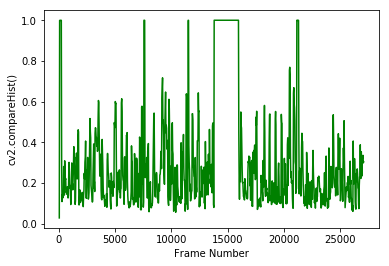

In [37]:
plt.plot(flist,res,'g')
plt.xlabel('Frame Number')
plt.ylabel('cv2.compareHist()')
plt.show()

In [14]:
import cv2
import numpy as np

image = cv2.imread('MSE/slide_3.jpg', 0)

cv2.imshow('Original', image)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
cv2.imshow('Erosion', erosion)

# 
dilation = cv2.dilate(image, kernel, iterations = 1)
cv2.imshow('Dilation', dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
cv2.imshow('Opening', opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
cv2.imshow('Closing', closing)

canny = cv2.Canny(image,60,120)
cv2.imshow('Canny',canny)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Connected Component

    1. erosion
    2. dilation
    3. contours
    4. canny edge
    5. connected component

In [1]:
import cv2
import numpy as np

In [20]:
image = cv2.imread('MSE/slide_3.jpg', 0)

cv2.imshow('Original', image)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(image, kernel, iterations = 1)

dilation = cv2.dilate(image, kernel, iterations = 1)

canny = cv2.Canny(image,60,120)

ret, thresh = cv2.threshold(image, 50, 255, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0,0,255), 1)
cv2.imshow('contours',image)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [29]:
topic = cv2.imread('MSE/slide_6.jpg')
subtopic = cv2.imread('MSE/slide_8.jpg')

x = manhattan_dist(topic[80:452,10:952],subtopic[80:452,10:952]), euclidean_dist(topic[80:452,10:952],subtopic[80:452,10:952])
y = manhattan_dist(topic[80:452,10:952],subtopic[80:452,10:952]), euclidean_dist(topic[80:452,10:952],subtopic[80:452,10:952])

(75339687, 6045.066500874907)